<a href="https://colab.research.google.com/github/YogeshPandey29/Projects/blob/master/Wine%20classification%20using%20Logistic%20Regression%20(multi-class%20classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this implementation, I have taken the dataset from UCI Machine Learning Repository. The dataset is about inspecting the quality of different types of wines and classifying them into one of the three categories (0, 1 and 2).
For this I have used a logisitc regression classifier to classify the dataset, from the sci-kit learn library.

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [12]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [17]:
winedata = pd.DataFrame(wine.data, columns = wine.feature_names)
winedata

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [18]:
winedata.shape

(178, 13)

In [22]:
winedata['Target'] = wine.target
winedata

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [23]:
winedata.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [54]:
winedata.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [24]:
winedata['Target'].value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

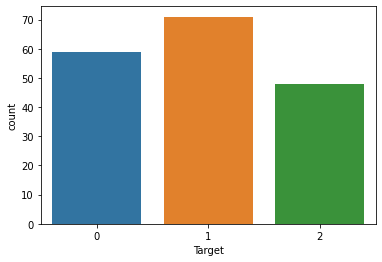

In [26]:
sns.countplot(winedata['Target'])

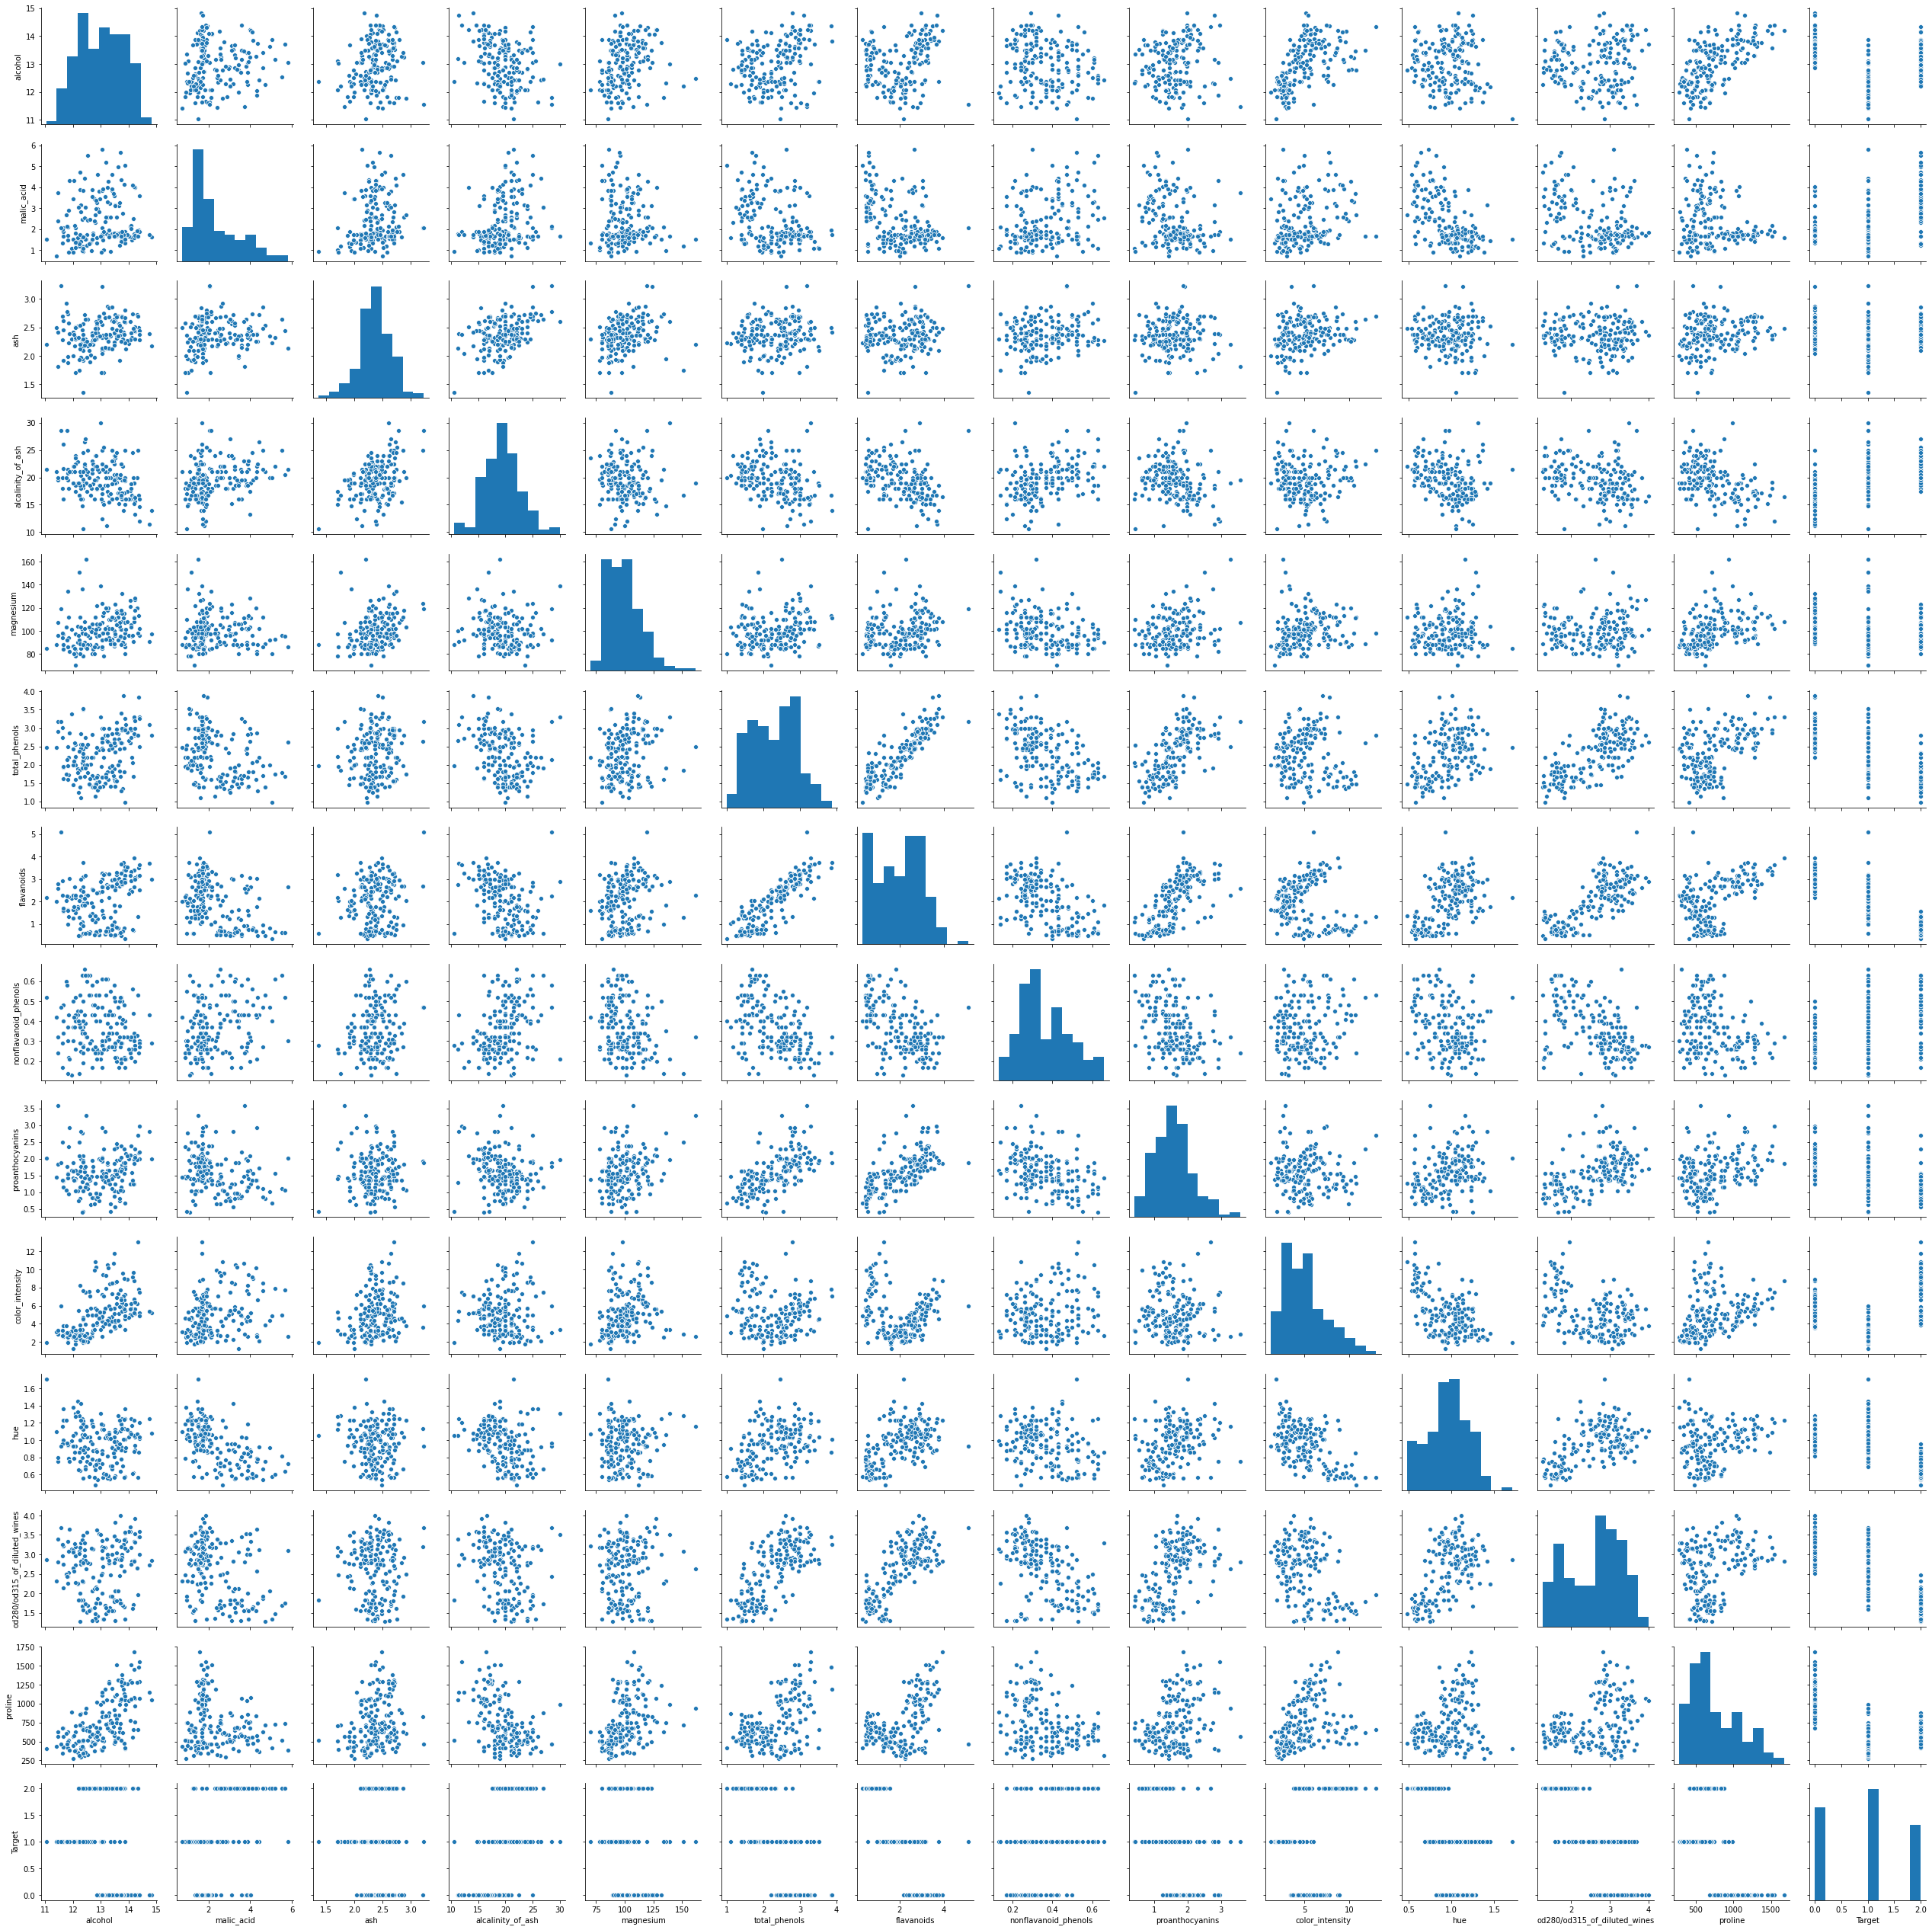

In [27]:
sns.pairplot(winedata)

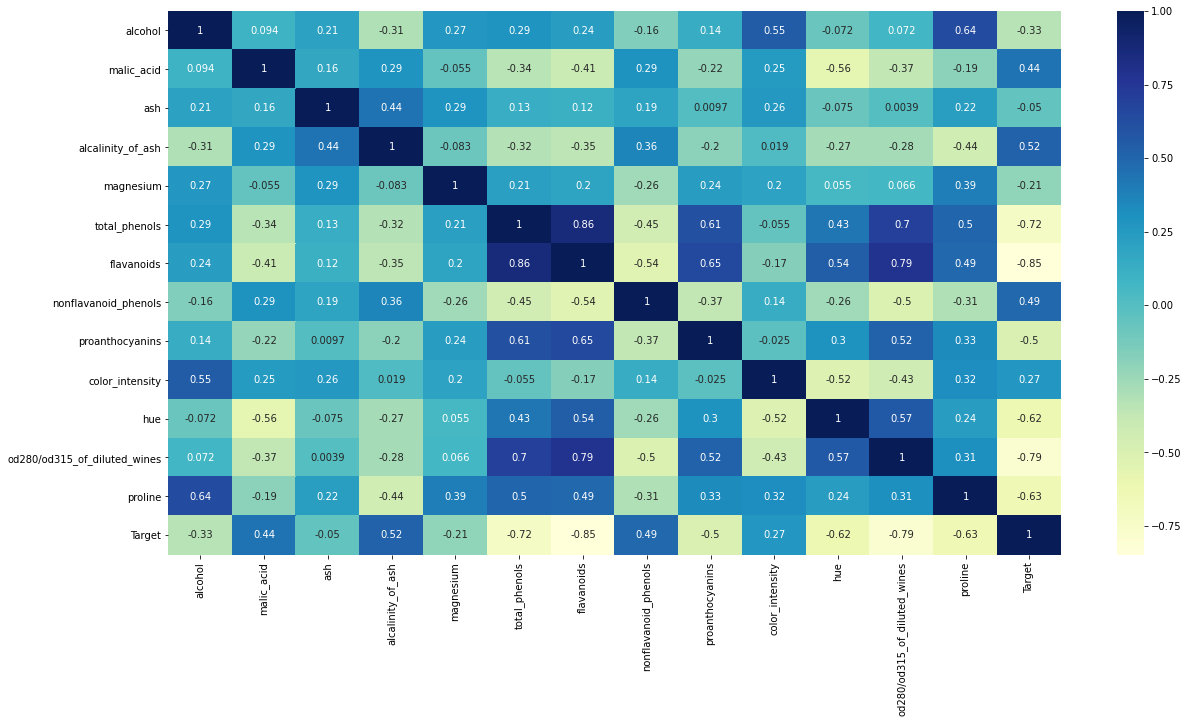

In [28]:
plt.figure(figsize = 20, 10))
sns.heatmap(winedata.corr(), annot = True, cmap = "YlGnBu")

In [29]:
X = winedata.iloc[:, 0:13]
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [30]:
y = winedata.iloc[:, 13]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)
print(X_train, y_train)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
163    12.96        3.45  2.35  ...  0.68                          1.75    675.0
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
11     14.12        1.48  2.32  ...  1.17                          2.82   1280.0
168    13.58        2.58  2.69  ...  0.74                          1.80    750.0
27     13.30        1.72  2.14  ...  1.02                          2.77   1285.0
..       ...         ...   ...  ...   ...                           ...      ...
103    11.82        1.72  1.88  ...  0.94                          2.44    415.0
151    12.79        2.67  2.48  ...  0.48                          1.47    480.0
67     12.37        1.17  1.92  ...  1.12                          3.48    510.0
25     13.05        2.05  3.22  ...  1.13                          3.20    830.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0

[142 rows x 13 columns] 163

In [42]:
print(X_test, y_test)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
147    12.87        4.61  2.48  ...  0.54                          1.86    625.0
36     13.28        1.64  2.84  ...  1.09                          2.78    880.0
167    12.82        3.37  2.30  ...  0.72                          1.75    685.0
171    12.77        2.39  2.28  ...  0.57                          1.63    470.0
126    12.43        1.53  2.29  ...  0.69                          2.84    352.0
133    12.70        3.55  2.36  ...  0.78                          1.29    600.0
102    12.34        2.45  2.46  ...  0.80                          3.38    438.0
32     13.68        1.83  2.36  ...  1.23                          2.87    990.0
120    11.45        2.40  2.42  ...  0.80                          3.39    625.0
143    13.62        4.95  2.35  ...  0.91                          2.05    550.0
22     13.71        1.86  2.36  ...  1.11                          4.00   1035.0
115    11.03        1.51  2.

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 5000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print(classifier.coef_)

[[ 0.5808678   0.45492811  0.67845617 -0.23921971 -0.02287738  0.35214071
   0.82017535  0.07569395  0.09872726  0.20975695 -0.00564497  0.59261158
   0.00866624]
 [-0.6769055  -0.84026854 -0.79643729  0.09079166 -0.03020662  0.22325395
   0.3224397   0.07373374  0.48695209 -0.93779981  0.33609084  0.01818311
  -0.00732955]
 [ 0.09603769  0.38534043  0.11798112  0.14842804  0.053084   -0.57539466
  -1.14261505 -0.14942769 -0.58567935  0.72804285 -0.33044587 -0.61079468
  -0.00133669]]


In [51]:
print(classifier.intercept_)

[-14.38323437  22.00114398  -7.61790961]


In [53]:
y_predicted = classifier.predict(X_test)
print(y_predicted)

[2 0 2 2 1 2 1 0 1 2 0 1 2 1 1 1 1 2 0 0 1 1 1 1 0 2 1 2 2 1 1 0 2 1 1 1]


In [55]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(rmse)                                             #the RMSE value is pretty low

0.16666666666666666


In [58]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_predicted)
print(acc_score)                                       #the model has an accuracy of about 97.2%

0.9722222222222222


In [56]:
from sklearn.metrics import confusion_matrix
cnf_mtrx  = confusion_matrix(y_test, y_predicted)
print(cnf_mtrx)                                         #it can be seen from this confusion matrix that the model is making only one false prediction
                                                        #which is indicated by the value 1 (in row3, col2)

[[ 7  0  0]
 [ 0 17  0]
 [ 0  1 11]]


In [59]:
test_case1 = classifier.predict([[13.27, 4.28, 2.26, 20.0, 120.0, 1.59, 0.69, 0.43, 1.35, 10.2, 0.59, 1.56, 835.0]])
print(test_case1)                                        #making some predictions on few training examples from the test set to ensure that our model
                                                          #is making spot on predictions

[2]


In [61]:
test_case2 = classifier.predict([[14.13, 4.10, 2.74, 24.5, 96.0, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.60, 560.0]])
print(test_case2)

[2]


In [62]:
sample_prediction1 = classifier.predict([[13.69, 1.25, 1.99, 19.7, 99, 2.69, 3.06, 0.69, 1.69, 4.24, 1.06, 1.70, 669.0]])
print(sample_prediction1)                              #after testing that the model is performing well on the training examples from our test set,
                                                        #we now start making predictions on some unseen training examples

[1]


In [64]:
sample_prediction2 = classifier.predict([[11.69, 2.25, 1.09, 13.7, 89, 2.29, 2.06, 0.75, 1.96, 3.24, 1.10, 1.79, 729.0]])
print(sample_prediction2)

[1]
